In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11846627.44it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200661.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3723980.79it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20274438.49it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Sneaker')

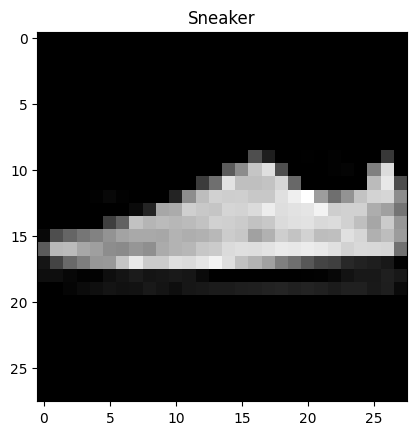

In [8]:
image, label = train_data[369]
print(image.shape)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

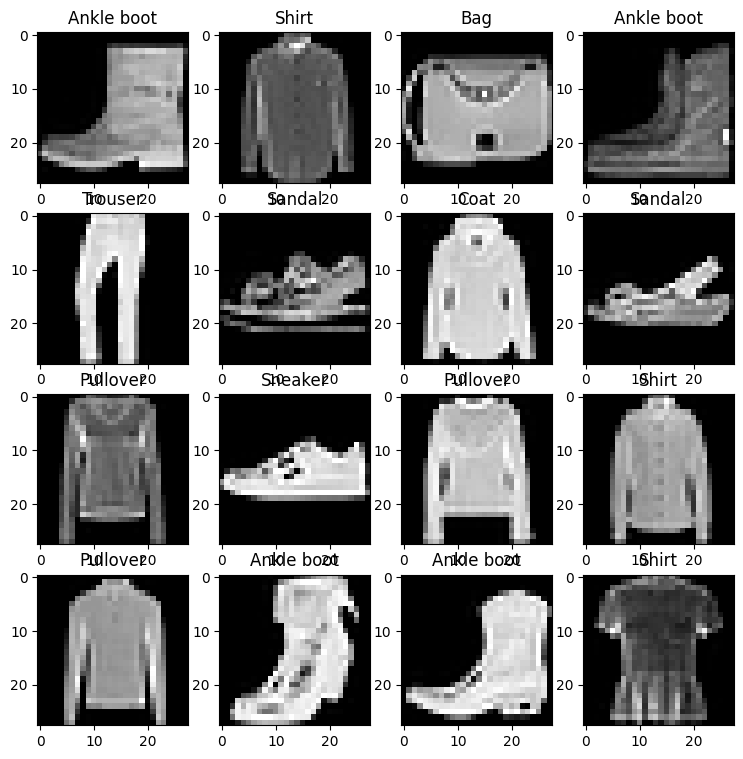

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b3302aaceb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b3302aad6f0>)

In [11]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [13]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x)
x.shape, output.shape


(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [14]:
from torch import nn
class fashionmodel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=output_shape),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [15]:
torch.manual_seed(42)

model = fashionmodel(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

model

fashionmodel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand([1,1,28,28])
model(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [17]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [18]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=0.1)

In [19]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float):
  total_time = end-start
  print(f"Train time is {total_time:.3f} seconds")

In [20]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n-----")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model.train()

    y_pred = model(X)

    losse = loss(y_pred, y)
    train_loss += losse

    optimizer.zero_grad()

    losse.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model(X_test)
      test_loss += loss(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))


    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end = timer()
total_train_time_model = print_train_time(start=train_time_start,
                                           end=train_time_end,
                                           )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch : 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch : 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time is 35.357 seconds


In [21]:
model.parameters()

<generator object Module.parameters at 0x7b3302f2fa00>

In [22]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss: torch.nn.Module,
               accuracy_fn):

  losse, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred= model(X)
      losse = loss(y_pred, y)
      acc += accuracy_fn(y_true= y,
                      y_pred= y_pred.argmax(dim=1))

    losse /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
              "model_loss": losse.item(),
              "model_acc": acc}

model_results = eval_model(model=model, data_loader=test_dataloader,
    loss=loss, accuracy_fn=accuracy_fn
)
model_results

{'model_name': 'fashionmodel',
 'model_loss': 0.0010536637855693698,
 'model_acc': 83.42651757188499}

In [23]:
class fashionmodel(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features = input_shape, out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units, out_features=output_shape),
    nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


In [24]:
torch.manual_seed(42)
model1 = fashionmodel(input_shape = 28*28,
                      hidden_units = 10,
                      output_shape=len(class_names))
next(model1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [25]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                        lr=0.1)

In [26]:
torch.manual_seed(42)

def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               ):

  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):


    y_pred = model(X)

    losse = loss_fn(y_pred, y)
    train_loss += losse
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    losse.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [27]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              ):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss : {test_loss:.5f}, Test Accuracy : {test_acc:.2f}%\n")


In [28]:
torch.manual_seed(42)

from timeit import default_timer as Timer
train_time_start = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch}\n-----")

  train_step(model= model1,
             data_loader=train_dataloader,
             loss_fn=loss,
             optimizer= optimizer,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model1,
            data_loader=test_dataloader,
            loss_fn=loss,
            accuracy_fn=accuracy_fn
            )

  train_time_end = timer()

train_time = print_train_time(start=train_time_start,
                              end=train_time_end)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch :0
-----
Train loss: 1.09199 | Train accuracy: 61.34%
Test Loss : 0.95636, Test Accuracy : 65.00%

Epoch :1
-----
Train loss: 0.78101 | Train accuracy: 71.93%
Test Loss : 0.72227, Test Accuracy : 73.91%

Epoch :2
-----
Train loss: 0.67027 | Train accuracy: 75.94%
Test Loss : 0.68500, Test Accuracy : 75.02%

Epoch :3
-----
Train loss: 0.64384 | Train accuracy: 76.52%
Test Loss : 0.65079, Test Accuracy : 76.13%

Epoch :4
-----
Train loss: 0.62892 | Train accuracy: 77.00%
Test Loss : 0.65277, Test Accuracy : 75.95%

Epoch :5
-----
Train loss: 0.61576 | Train accuracy: 77.41%
Test Loss : 0.64104, Test Accuracy : 76.50%

Epoch :6
-----
Train loss: 0.60668 | Train accuracy: 77.78%
Test Loss : 0.62651, Test Accuracy : 76.61%

Epoch :7
-----
Train loss: 0.45148 | Train accuracy: 83.94%
Test Loss : 0.45020, Test Accuracy : 84.39%

Epoch :8
-----
Train loss: 0.39916 | Train accuracy: 85.95%
Test Loss : 0.43955, Test Accuracy : 84.86%

Epoch :9
-----
Train loss: 0.39335 | Train accuracy: 86

In [29]:
class fashioncnn(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
                  )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features=output_shape)
        )

  def forward(self, x):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x



In [30]:
torch.manual_seed(42)
model2 = fashioncnn(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_names))

In [31]:
torch.manual_seed(42)
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [32]:
conv_layer = nn.Conv2d(in_channels =3,
                       out_channels =10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image)

In [33]:
conv_output.shape

torch.Size([10, 62, 62])

In [34]:
mpl = nn.MaxPool2d(kernel_size=2)
print(test_image.shape)
test_image_trough_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_trough_conv.shape)
test_image_trough_mpl = mpl(test_image_trough_conv)
print(test_image_trough_mpl.shape)

torch.Size([3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [35]:
torch.manual_seed(42)

rt = torch.randn(size = (1,1,2,2))
print(rt)
print(rt.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])


In [36]:
mpl = nn.MaxPool2d(kernel_size=2)

mpt = mpl(rt)
print(mpt)
print(mpt.shape)


tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


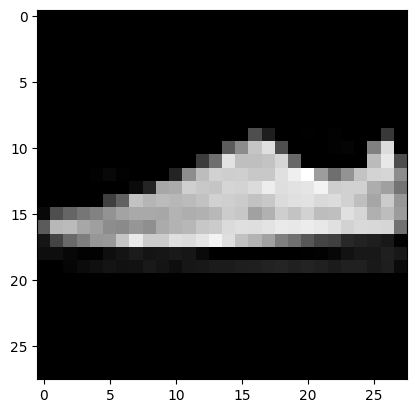

In [37]:
plt.imshow(image.squeeze(), cmap="gray")

In [38]:
rt = torch.randn(size=(1,28,28))
rt.shape

torch.Size([1, 28, 28])

In [39]:
model2(rt.unsqueeze(dim=1))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], grad_fn=<AddmmBackward0>)

In [40]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.01)

In [41]:
torch.manual_seed(42)

start = timer()

epochs = 50

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model=model2,
             data_loader=train_dataloader,
             loss_fn=loss,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model2,
             data_loader=test_dataloader,
             loss_fn=loss,
             accuracy_fn=accuracy_fn)

  end = timer()

  total_time = print_train_time(start=start,
                                end=end)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 1.03785 | Train accuracy: 62.34%
Test Loss : 0.62529, Test Accuracy : 76.86%

Train time is 38.018 seconds
Epoch: 1
----
Train loss: 0.54950 | Train accuracy: 80.00%
Test Loss : 0.49837, Test Accuracy : 81.53%

Train time is 74.878 seconds
Epoch: 2
----
Train loss: 0.45570 | Train accuracy: 83.51%
Test Loss : 0.44082, Test Accuracy : 84.21%

Train time is 112.598 seconds
Epoch: 3
----
Train loss: 0.41318 | Train accuracy: 85.15%
Test Loss : 0.41260, Test Accuracy : 85.39%

Train time is 149.897 seconds
Epoch: 4
----
Train loss: 0.38668 | Train accuracy: 86.14%
Test Loss : 0.39869, Test Accuracy : 85.99%

Train time is 186.950 seconds
Epoch: 5
----
Train loss: 0.36701 | Train accuracy: 86.93%
Test Loss : 0.38336, Test Accuracy : 86.75%

Train time is 223.202 seconds
Epoch: 6
----
Train loss: 0.35159 | Train accuracy: 87.47%
Test Loss : 0.37855, Test Accuracy : 86.61%

Train time is 259.996 seconds
Epoch: 7
----
Train loss: 0.34013 | Train accuracy: 87.80%
Test 

In [177]:
def make_predictions(model,
                     data):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

In [180]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

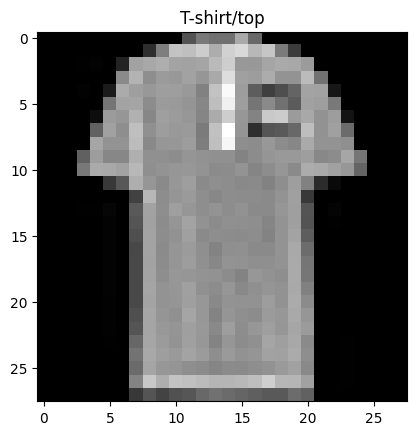

In [183]:
plt.imshow(test_samples[5].squeeze(), cmap="gray")
plt.title(class_names[test_labels[5]])

In [184]:
pred_probs = make_predictions(model=model2,
                              data=test_samples)

pred_probs[0]

tensor([1.5510e-07, 4.6034e-09, 4.5402e-08, 8.8205e-09, 2.2131e-09, 9.9007e-01,
        1.1064e-07, 1.7857e-05, 7.1199e-05, 9.8399e-03])

In [185]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [191]:
from tqdm.auto import tqdm

y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions...."):
    y_logit = model2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making Predictions....:   0%|          | 0/313 [00:00<?, ?it/s]